In [90]:
import numpy as np
import time
import os
import math
import h5py
from matplotlib import colors as mcolors
from utils import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
%matplotlib notebook

In [8]:
spectra=get_hdf5('scan_banda_completa.hdf5', 'spectra')
d_off=get_hdf5('scan_banda_completa.hdf5', 'd_off')

In [12]:
f=get_hdf5('parametri_scattering.hdf5', 'freqs')

In [13]:
#pump power
p0 = -18.5 #-45
p1 = -17.5 #-15 #best: 19
dp = 0.10 #2
P = np.arange(p0, p1, dp)
N_p = P.size
print(N_p)

#pump frequency
f0 = 17.75 #16.5
f1 = 18.25 #17.5
df = 50e-5
F = np.arange(f0, f1, df)
N_f = F.size
print(N_f)

#bias voltageat SIM
v0 = 0.300
v1 = 0.340
dv = 0.002
V = np.arange(v0, v1, dv)
N_v = V.size
print(N_v)

10
1000
21


In [14]:
real_spectra = spectra - d_off #d_off is the spectral density corresponding to no bias voltage
bw_tensor = np.empty((N_f, N_v, N_p))
gain_tensor = np.empty((N_f, N_v, N_p))

for i in range(0, N_v):
    for j in range(0, N_p):
        for k in range(0, N_f):
            bw_tensor[k,i,j], i1, i2 = band_width_info(f, spectra[k,i,j,:])
            gain_tensor[k,i,j] = np.mean(real_spectra[k,i,j,i1:i2])

In [18]:
product_tensor = bw_tensor * gain_tensor

In [24]:
bw_tensor.shape

(1000, 21, 10)

<IPython.core.display.Javascript object>


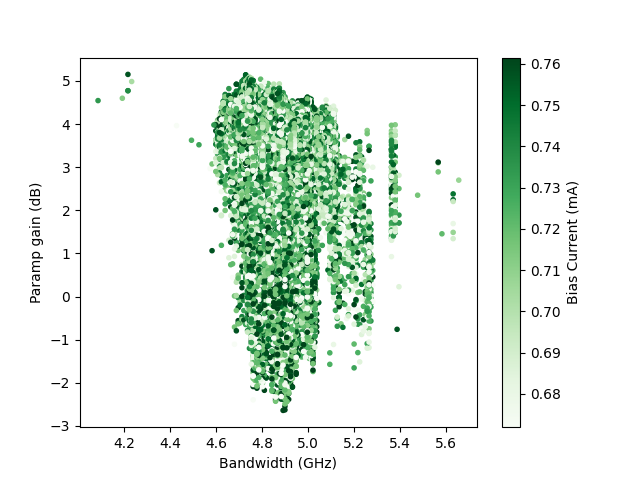

In [34]:
c3D = np.tile(V, (1000,1,10))*2.23974763407
plt.scatter(bw_tensor/1e9, gain_tensor, marker='.', c=c3D, cmap='Greens')
cb=plt.colorbar()
cb.set_label('Bias Current (mA)')


plt.xlabel('Bandwidth (GHz)')
plt.ylabel('Paramp gain (dB)')
plt.savefig('current_scatter.png')

<IPython.core.display.Javascript object>


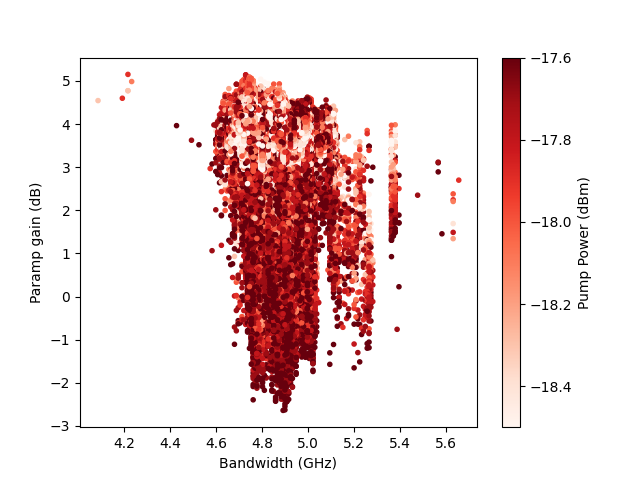

In [37]:
p3D = np.tile(P, (1000,21,1))
plt.scatter(bw_tensor/1e9, gain_tensor, marker='.', c=p3D, cmap='Reds')
cb=plt.colorbar()
cb.set_label('Pump Power (dBm)')

plt.xlabel('Bandwidth (GHz)')
plt.ylabel('Paramp gain (dB)')
plt.savefig('pumppower_scatter.png')

<IPython.core.display.Javascript object>


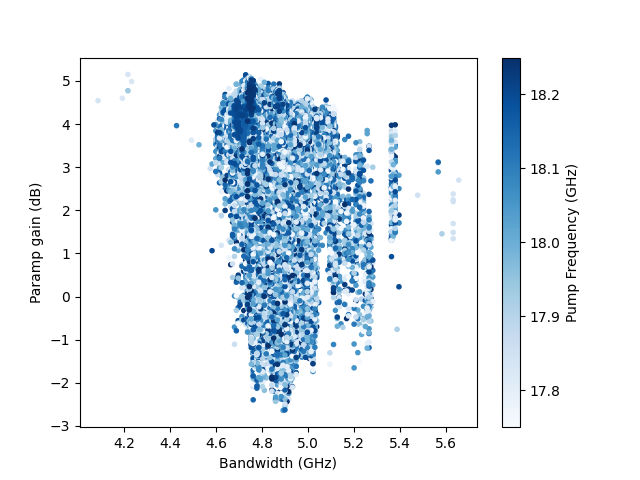

In [65]:
f3D = np.tile(F, (1,21,10))
plt.scatter(bw_tensor/1e9, gain_tensor, marker='.', c=f3D, cmap='Blues')
cb=plt.colorbar()
cb.set_label('Pump Frequency (GHz)')

plt.xlabel('Bandwidth (GHz)')
plt.ylabel('Paramp gain (dB)')
plt.savefig('pumpfreq_scatter.png')

In [96]:
prod_best = product_tensor.max()
k_best, i_best, j_best = np.where(product_tensor == prod_best)
gain_best = gain_tensor[k_best, i_best, j_best][0]
bw_best = bw_tensor[k_best, i_best, j_best][0]
pump_freq_best = F[k_best][0]
pump_pow_best = P[j_best][0]
volt_best = V[i_best][0]

print(volt_best, pump_freq_best, pump_pow_best)
print(bw_best, gain_best)
print(prod_best)

'''
plt.xlabel('Bandwidth (GHz)')
plt.ylabel('Paramp gain (dB)')


x=np.linspace(bw_tensor.min(), bw_tensor.max(), 10000)
y1=prod_best/x
y5=np.zeros(10000)
y3=y1/2
y4=y1/4
y2=y1*3/4
plt.plot(x/1e9,y1, '#55CF00', x/1e9, y2, '#B9CF00', x/1e9, y3, '#FFDC00', x/1e9, y4, '#FF8000', x/1e9, y5, 'r')
plt.legend(['GBWP = ' + str(prod_best), 'GBWP = ' + str(prod_best*3/4), 'GBWP = ' + str(prod_best/2), 'GBWP = ' + str(prod_best/4), 'GBWP = 0'], prop={'size': 6})
plt.scatter(bw_tensor/1e9, gain_tensor, marker='.')
plt.plot(bw_best/1e9, gain_best, '*r')
#plt.savefig('pumpfreq_scatter.png')
'''

0.34 18.24399999999885 -17.79999999999999
4728750000.0 5.141433766871135
24312554925.091877


"\nplt.xlabel('Bandwidth (GHz)')\nplt.ylabel('Paramp gain (dB)')\n\n\nx=np.linspace(bw_tensor.min(), bw_tensor.max(), 10000)\ny1=prod_best/x\ny5=np.zeros(10000)\ny3=y1/2\ny4=y1/4\ny2=y1*3/4\nplt.plot(x/1e9,y1, '#55CF00', x/1e9, y2, '#B9CF00', x/1e9, y3, '#FFDC00', x/1e9, y4, '#FF8000', x/1e9, y5, 'r')\nplt.legend(['GBWP = ' + str(prod_best), 'GBWP = ' + str(prod_best*3/4), 'GBWP = ' + str(prod_best/2), 'GBWP = ' + str(prod_best/4), 'GBWP = 0'], prop={'size': 6})\nplt.scatter(bw_tensor/1e9, gain_tensor, marker='.')\nplt.plot(bw_best/1e9, gain_best, '*r')\n#plt.savefig('pumpfreq_scatter.png')\n"

<IPython.core.display.Javascript object>


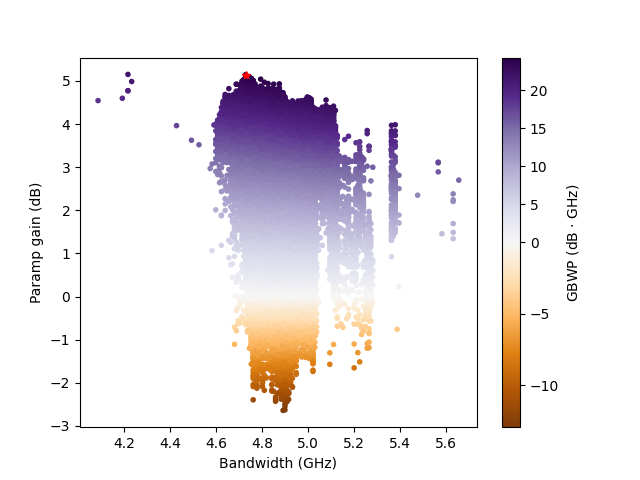

In [94]:
plt.xlabel('Bandwidth (GHz)')
plt.ylabel('Paramp gain (dB)')

normalize=mcolors.TwoSlopeNorm(vcenter=0)

plt.scatter(bw_tensor/1e9, gain_tensor, marker='.', c=product_tensor/1e9, cmap='PuOr', norm=normalize)
plt.plot(bw_best/1e9, gain_best, '*r')
cb=plt.colorbar()
cb.set_label( "GBWP (dB $\cdot$ GHz) ")
plt.savefig('GBWP_scatter.png')